<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/Two_camera_alignment_Optical_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html

using two images of beads from confocal list

the issue of channle intensity imbalance makes visualiation of shift difficult

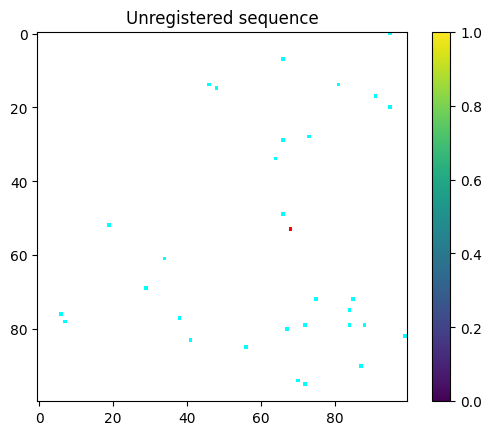

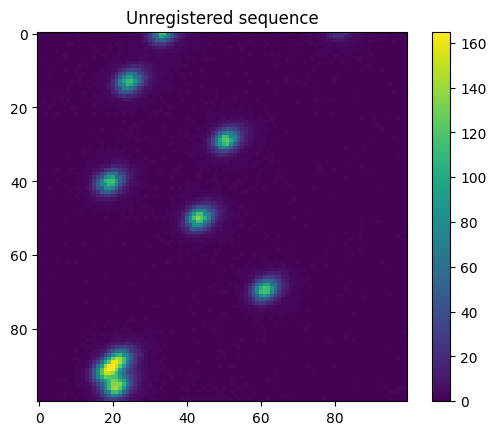

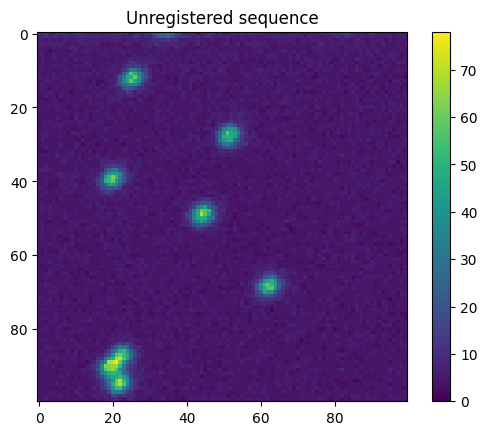

In [56]:
from skimage import io
test = io.imread('/content/drive/MyDrive/Colab images/test.tif')
img1 = test[0,:100,1948:]
img2 = test[1,:100,1948:]

nr, nc = img1.shape
# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = img1
seq_im[..., 1] = img2
seq_im[..., 2] = img2

plt.imshow(seq_im)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()


plt.imshow(img1)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

plt.imshow(img2)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

In [46]:
from skimage import img_as_float
img1 = img_as_float(img1)
img2 = img_as_float(img2)

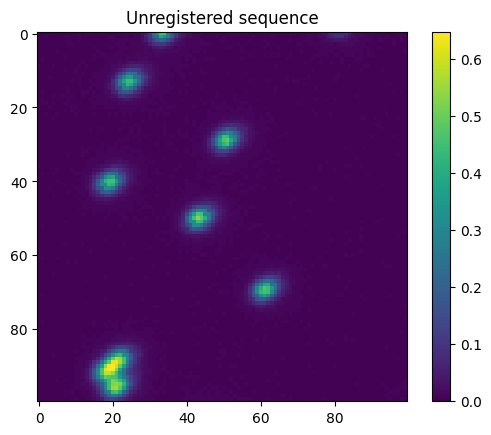

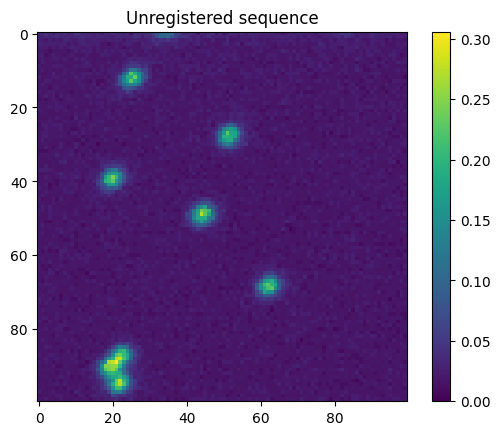

In [47]:
plt.imshow(img1)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

plt.imshow(img2)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

normalize the intensity for each image

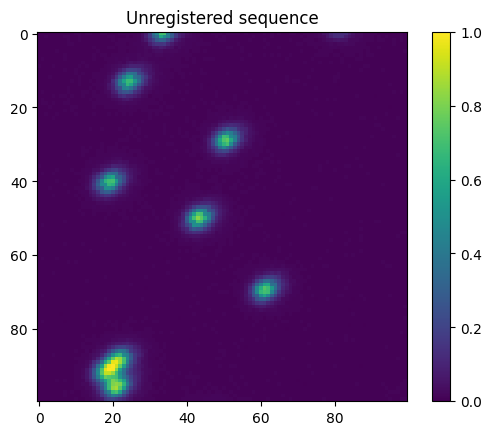

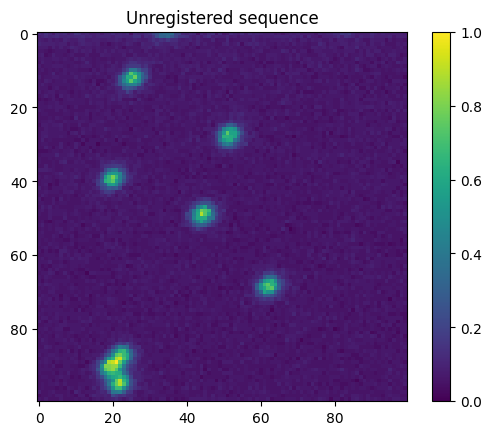

In [48]:
img1 /= img1.max()
img2 /= img2.max()

plt.imshow(img1)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

plt.imshow(img2)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

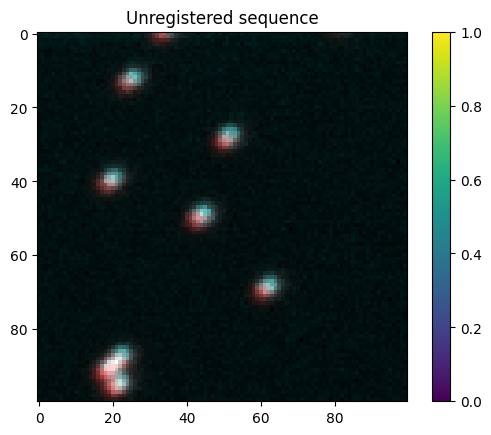

In [49]:
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = img1
seq_im[..., 1] = img2
seq_im[..., 2] = img2

plt.imshow(seq_im)
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

In [52]:
v, u = optical_flow_tvl1(img1, img2)

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')

img2_warp = warp(img2, np.array([row_coords + v, col_coords + u]), mode='edge')

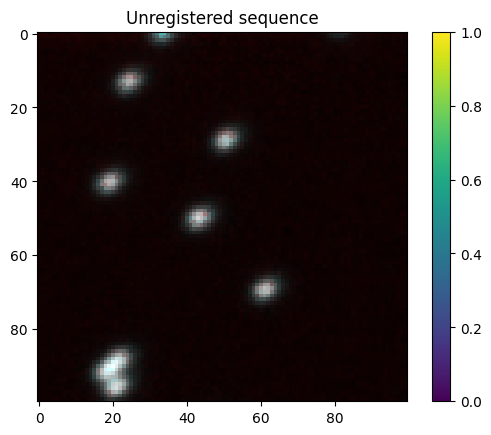

In [53]:
# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = img2_warp
reg_im[..., 1] = img1
reg_im[..., 2] = img1

plt.imshow(reg_im[:100,nc-100:])
plt.title("Unregistered sequence")
plt.colorbar()
plt.show()

The next step is if it will do for the entire image, fix the scaling issue on four corners

after that, can use the u, v vector to fix real data acquired from the same settings

Below is the code from skimage

optical flow

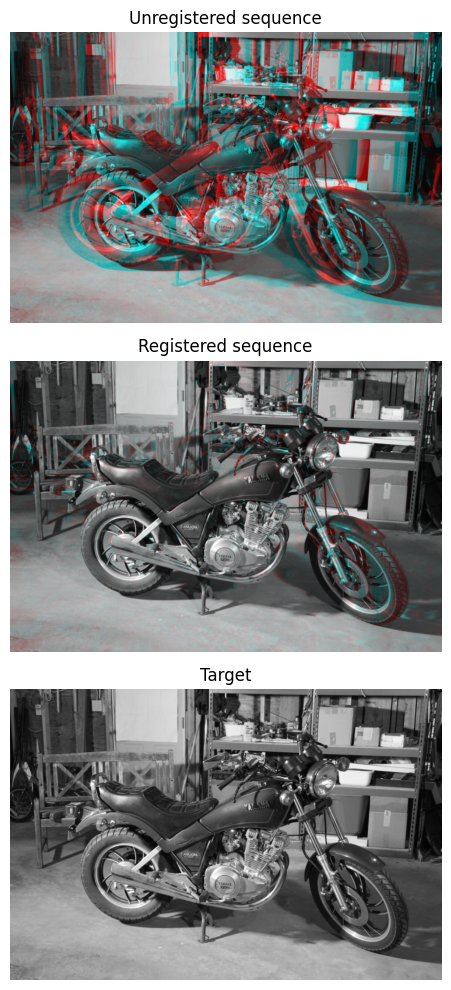

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

# --- Load the sequence
image0, image1, disp = stereo_motorcycle()

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]), mode='edge')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()